In [1]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf

In [26]:
url="https://covid19.isciii.es/resources/serie_historica_acumulados.csv"
t=requests.get(url).text
s=t.split("NOTA")[0]

In [27]:
#df=pd.read_csv('serie_historica_acumulados.csv', parse_dates=True)

In [50]:
df=pd.read_csv(io.StringIO(s), parse_dates=True)

In [51]:
df.fillna(0, inplace=True)

In [52]:
df['FECHA'] = pd.to_datetime(df['FECHA'],dayfirst=True)

In [53]:
df

,CCAA,FECHA,CASOS,Hospitalizados,UCI,Fallecidos,Recuperados
0,AN,2020-02-20,0.0,0.0,0.0,0.0,0.0
1,AR,2020-02-20,0.0,0.0,0.0,0.0,0.0
2,AS,2020-02-20,0.0,0.0,0.0,0.0,0.0
3,IB,2020-02-20,1.0,0.0,0.0,0.0,0.0
4,CN,2020-02-20,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
983,ML,2020-04-11,98.0,43.0,3.0,2.0,18.0
984,MC,2020-04-11,1449.0,537.0,91.0,97.0,344.0
985,NC,2020-04-11,3969.0,1663.0,124.0,232.0,650.0
986,PV,2020-04-11,10772.0,5547.0,459.0,804.0,4867.0


In [54]:
df = df.groupby('FECHA')['UCI'].sum().to_frame()

In [56]:
df=df.sort_values(by='UCI')

In [58]:
df['Index'] = range(1, len(df) + 1)

In [60]:
df=df.set_index('Index')

In [62]:
df['Dif. UCI'] = df['UCI'] - df['UCI'].shift(1)

In [64]:
df.fillna(0, inplace=True)

In [38]:
df.drop('UCI', axis=1, inplace=True)

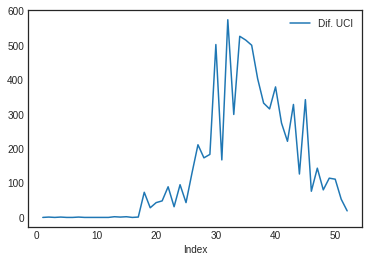

In [39]:
df.plot()

In [40]:
yData=df[df['Dif. UCI']>0].to_numpy()
yData=yData.reshape(yData.size)
xData=np.arange(yData.size)

In [41]:
yData

array([  1.,   1.,   1.,   2.,   1.,   2.,   1.,  73.,  28.,  43.,  48.,
        89.,  31.,  95.,  43., 129., 211., 173., 183., 502., 167., 574.,
       299., 526., 515., 500., 403., 332., 315., 379., 274., 221., 328.,
       126., 342.,  76., 143.,  80., 114., 111.,  53.,  19.])

In [42]:
#Example of regression function - Polynomial
#def func(x, a ,b, c, d):
#    return a*np.exp(b*x)
#    return a+ b*x + c*pow(x,2)+ d*pow(x,3) #+ e*pow(x,4) + f*pow(x,5) + g*pow(x,6)

In [43]:
#Example of regression function
#def func(x, amp, cen, wid):
#    return amp * np.exp(-(x-cen)**2 / wid)

In [44]:
#Regression function - skew normal
def func(x, sigmag, mu, alpha,a):
    c = 0
    #normal distribution
    normpdf = (1/(sigmag*np.sqrt(2*np.pi)))*np.exp(-(np.power((x-mu),2)/(2*np.power(sigmag,2))))
    normcdf = (0.5*(1+erf((alpha*((x-mu)/sigmag))/(np.sqrt(2)))))
    return 2*a*normpdf*normcdf + c

In [45]:
popt, pcov = curve_fit(func, xData, yData, p0=(1,1,1,20000))
print(popt)
print(pcov)

[1.00990576e+01 1.84310663e+01 2.19545331e+00 7.51528754e+03]
[[ 2.11818362e+00 -1.31157328e+00  1.15935029e+00  3.04325698e+02]
 [-1.31157328e+00  1.05158787e+00 -8.02475796e-01 -1.51627356e+02]
 [ 1.15935029e+00 -8.02475796e-01  8.73807548e-01  6.42623315e+01]
 [ 3.04325698e+02 -1.51627356e+02  6.42623315e+01  2.28528565e+05]]


In [46]:
xFit = np.arange(0.0, yData.size + 10, 1)

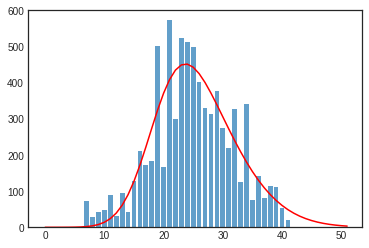

In [47]:
plt.style.use('seaborn-white')
plt.bar(xData, yData, align='center', alpha=0.7)
plt.plot(xFit, func(xFit, *popt), 'r')
plt.show()

In [49]:
#Prediction for the next day:
int(func(yData.size, *popt))

38